In [1]:
import re
import networkx as nx

In [3]:
import pandas as pd
df = pd.read_csv('./data/smartphone.csv', encoding='utf-8')
galexy_posts = df.get('Title') + " " + df.get('Description')
galexy_post_date = df.get('Post Date')

In [4]:
from eunjeon import Mecab
tagger = Mecab()
galexy_stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 중 북 수 팩 년 월 저 탭"
galexy_stop_words = galexy_stop_words.split(' ')
galexy_stop_words[0:10]

['은', '이', '것', '등', '더', '를', '좀', '즉', '인', '옹']

In [5]:
galexy_nouns = []
nouns = []
for post in galexy_posts:
    for noun in tagger.nouns(post):
        if noun not in galexy_stop_words:
            nouns.append(noun)
    galexy_nouns.append(nouns)

In [6]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

In [7]:
galexy_word2vec = Word2Vec(galexy_nouns, min_count=1)

In [8]:
galexy_word2vec.wv.most_similar("핸드폰")

[('막내', 0.33973363041877747),
 ('화재', 0.3188154101371765),
 ('스마트폰', 0.31379619240760803),
 ('부팅', 0.3006746470928192),
 ('광장', 0.2776130437850952),
 ('코', 0.27573561668395996),
 ('하만', 0.26999351382255554),
 ('옥외', 0.25834915041923523),
 ('어려움', 0.25672775506973267),
 ('최선', 0.2543189525604248)]

In [9]:
galexy_vocab = galexy_word2vec.wv.vocab
galexy_similarity = galexy_word2vec[galexy_vocab]

c:\python\venv\tensorflow\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [10]:
galexy_tsne = TSNE(n_components=2)

In [11]:
galexy_transform_similarity = galexy_tsne.fit_transform(galexy_similarity)
galexy_df = pd.DataFrame(galexy_transform_similarity, index=galexy_vocab, columns=['x', 'y'])

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
sns.lmplot('x', 'y', data=galexy_df, fit_reg=False, size=6)
plt.show()

c:\python\venv\tensorflow\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 600x600 with 1 Axes>

In [13]:
galexy_kmeans = KMeans(n_clusters=3)
galexy_predict = galexy_kmeans.fit_predict(galexy_df)
galexy_predict

array([0, 0, 0, ..., 2, 0, 0])

In [14]:
galexy_results = galexy_df
galexy_results["predict"] = galexy_predict
galexy_results[0:10]

,x,y,predict
삼성,-13.583300,61.300217,0
더블,-6.793263,62.954239,0
갤럭시,-13.832089,60.726776,0
특징,9.783742,24.209829,0
사전,114.152985,-22.509109,2
예약,3.890029,3.922600,0
새벽,33.315670,10.924767,0
언,-5.378881,42.873333,0
공개,-7.572998,62.803116,0
폴드,-6.879856,62.884979,0


c:\python\venv\tensorflow\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


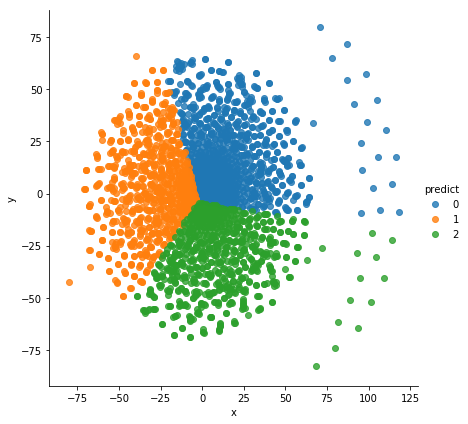

In [15]:
sns.lmplot('x', 'y', data=galexy_results, fit_reg=False, size=6, hue="predict")
plt.show()

In [16]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
galexy_distmatrix = pdist(galexy_df, metric='euclidean')
galexy_row_dist = pd.DataFrame(squareform(galexy_distmatrix))
galexy_row_dist

,0,1,2,3,4,5,6,7,8,9,...,2784,2785,2786,2787,2788,2789,2790,2791,2792,2793
0,0.000000,6.988589,0.625084,43.837375,152.789271,59.979231,68.827315,20.170834,6.195356,6.888224,...,54.794044,65.738112,73.748919,57.886769,63.886512,55.859266,62.330888,71.941530,63.796608,57.286158
1,6.988589,0.000000,7.382863,42.141742,148.107997,59.990558,65.694691,20.130655,0.794244,0.110883,...,54.838745,65.044426,72.563439,58.930061,63.109097,56.933927,62.447226,72.999153,61.797454,56.376092
2,0.625084,7.382863,0.000000,43.487871,152.683961,59.504520,68.579525,19.753536,6.594499,7.279519,...,54.319766,65.304498,73.345316,57.357422,63.459100,55.329139,61.849152,71.407681,63.456480,56.870673
3,43.837375,42.141742,43.487871,0.000000,114.366070,21.125991,27.023037,24.046445,42.316642,42.112263,...,16.994353,23.737604,30.510939,25.008011,21.703841,23.714335,23.678508,36.868866,19.986656,14.983140
4,152.789271,148.107997,152.683961,114.366070,0.000000,113.404385,87.501403,136.259791,148.658638,148.138782,...,116.081389,105.230379,96.874697,122.108978,105.609180,122.979113,113.175225,118.733958,97.584055,108.602639
5,59.979231,59.990558,59.504520,21.125991,113.404385,0.000000,30.247292,40.038385,59.985966,59.937906,...,5.185358,8.326694,17.423378,8.906605,7.813000,9.576819,2.577583,16.052489,18.061998,8.335757
6,68.827315,65.694691,68.579525,27.023037,87.501403,30.247292,0.000000,50.179469,66.054872,65.692799,...,30.964230,24.167379,21.400546,38.942764,23.275602,39.073349,31.268438,42.736459,12.185988,23.064752
7,20.170834,20.130655,19.753536,24.046445,136.259791,40.038385,50.179469,0.000000,20.050197,20.067858,...,34.861775,45.578253,53.597506,38.824038,43.718537,36.837258,42.453059,52.892173,44.015453,37.117348
8,6.195356,0.794244,6.594499,42.316642,148.658638,59.985966,66.054872,20.050197,0.000000,0.697959,...,54.826492,65.123449,72.702552,58.807753,63.196557,56.806631,62.432303,72.883166,62.024563,56.474197
9,6.888224,0.110883,7.279519,42.112263,148.138782,59.937906,65.692799,20.067858,0.697959,0.000000,...,54.785100,65.002390,72.529423,58.863512,63.068144,56.866797,62.393330,72.933441,61.775590,56.336468


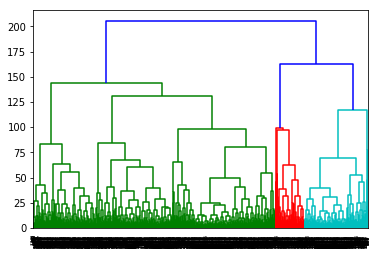

In [17]:
galexy_row_clusters=linkage(galexy_distmatrix,method='complete')
pd.DataFrame(galexy_row_clusters)
galexy_row_dendrogram = dendrogram(galexy_row_clusters)

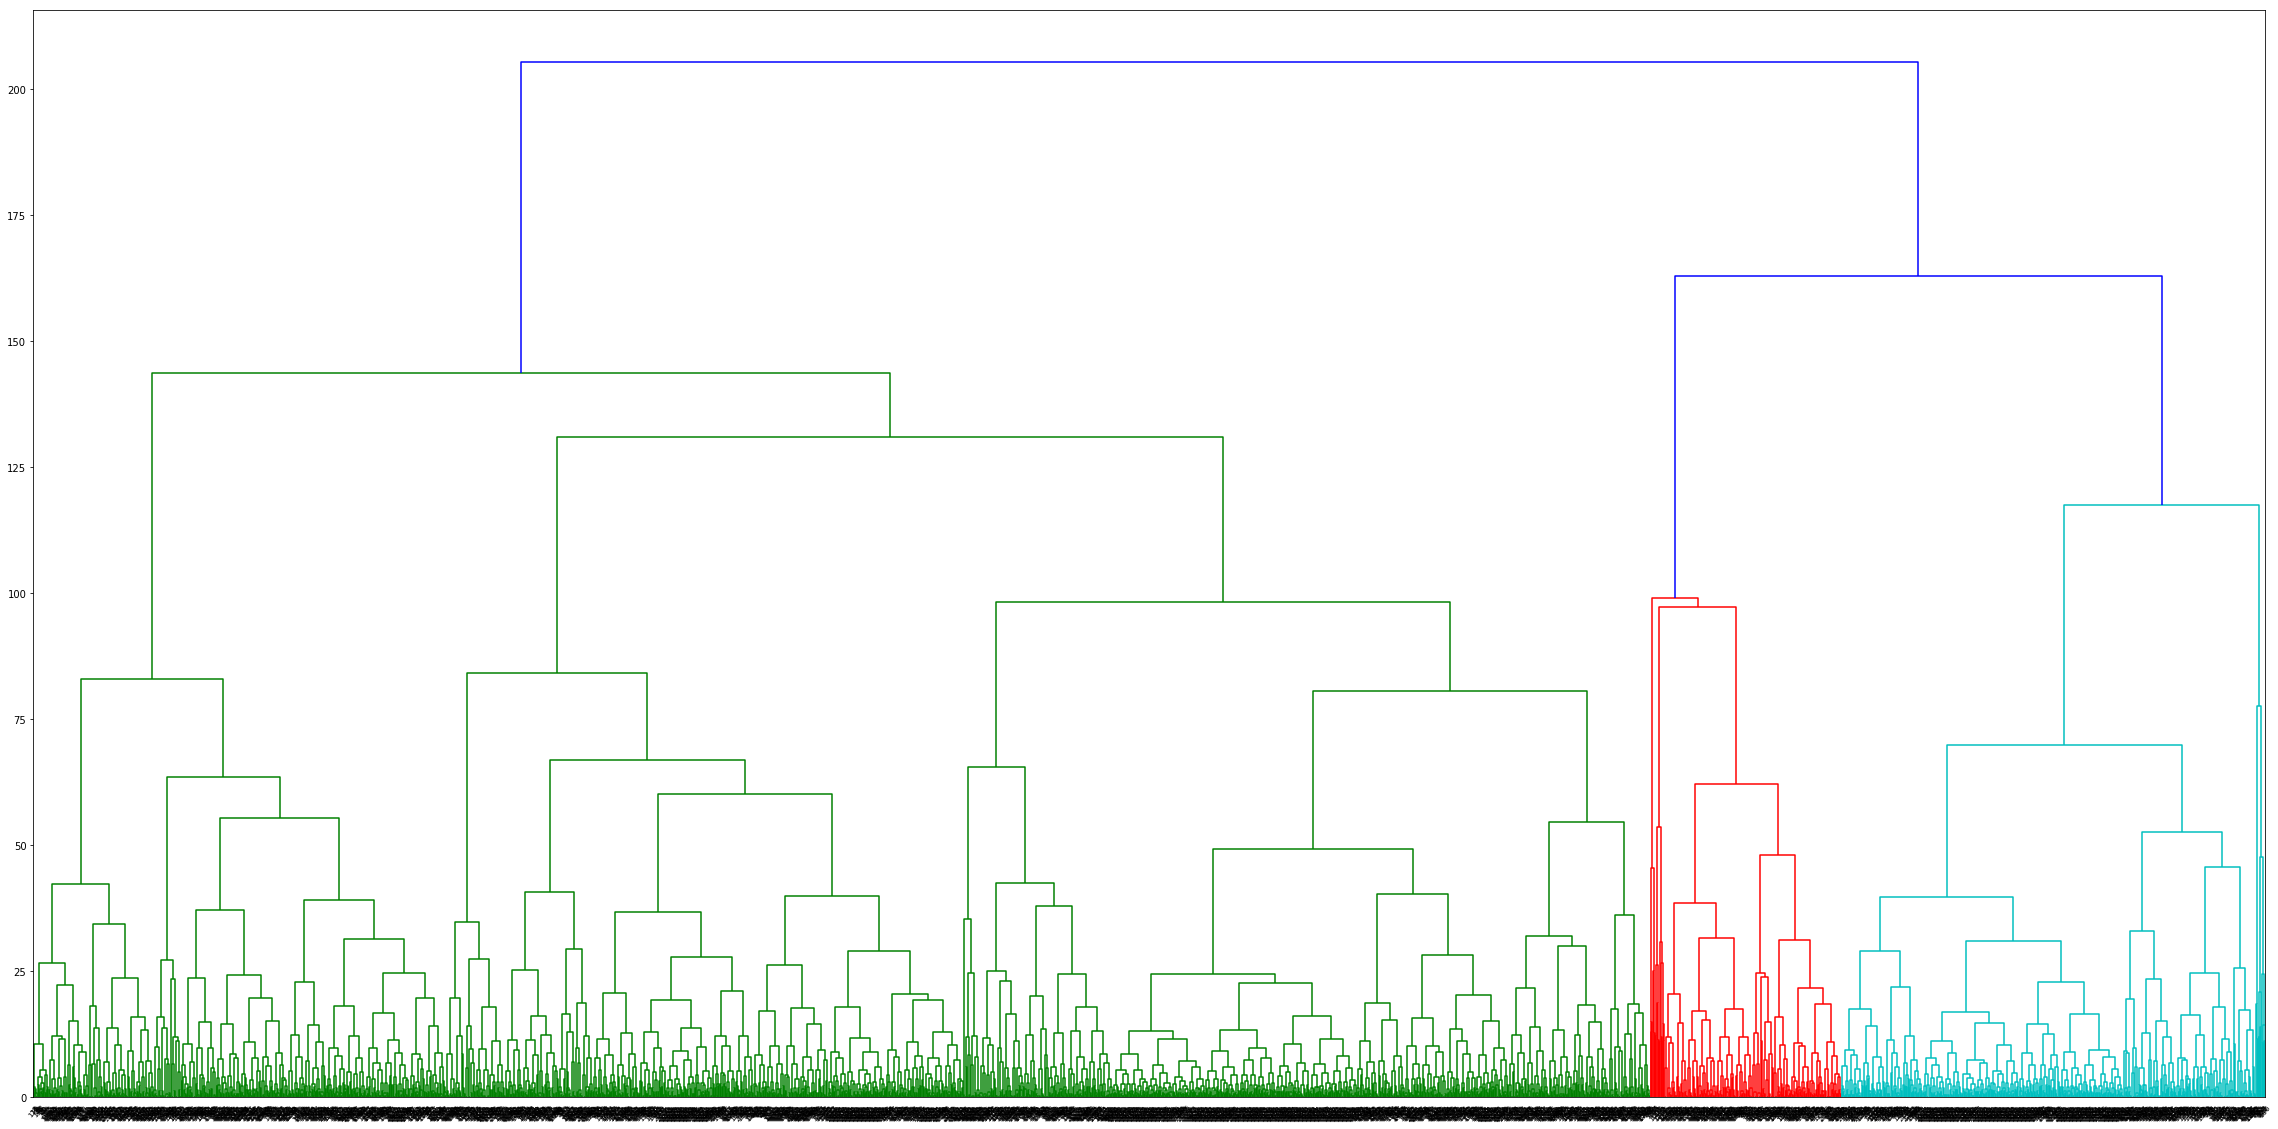

In [18]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

galexy_mergings=linkage(galexy_df,method='complete')

plt.figure(figsize=(40,20))
dendrogram(galexy_mergings,
           leaf_rotation=50,
           leaf_font_size=7,
)
plt.show()